In [1]:
import cv2
import matplotlib.pyplot as plt

In [5]:
file_list = []
image_dir = "/home/kodogyu/shared_folder_local/kitti_100_frames/"

for frame_idx in range(100):
    file = image_dir + f'{frame_idx:06}.png'
    file_list.append(file)

print(file_list[:3])

['/home/kodogyu/shared_folder_local/kitti_100_frames/000000.png', '/home/kodogyu/shared_folder_local/kitti_100_frames/000001.png', '/home/kodogyu/shared_folder_local/kitti_100_frames/000002.png']


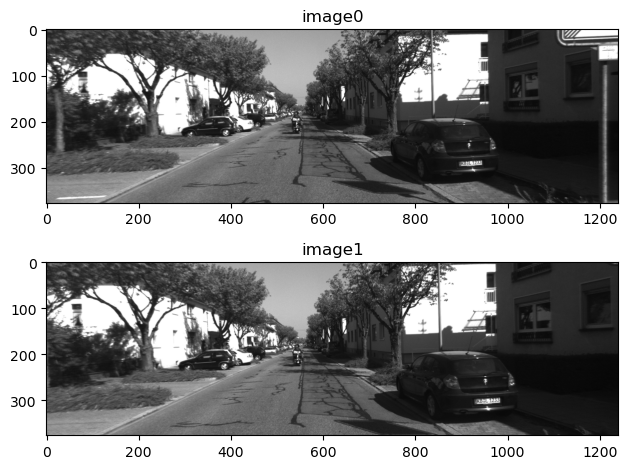

In [17]:
image0 = cv2.imread(file_list[0])
image1 = cv2.imread(file_list[1])

image0_gray = cv2.cvtColor(image0, cv2.COLOR_BGR2GRAY)
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(2, 1)
axs[0].imshow(image0)
axs[0].set_title("image0")
axs[1].imshow(image1)
axs[1].set_title("image1")
plt.tight_layout()
plt.show()

In [11]:
# feature extraction
orb = cv2.ORB_create(3000, 1.2, 8, 31, 0, 2, cv2.ORB_HARRIS_SCORE, 31, 25)

kp0, des0 = orb.detectAndCompute(image0_gray, None)
kp1, des1 = orb.detectAndCompute(image1_gray, None)

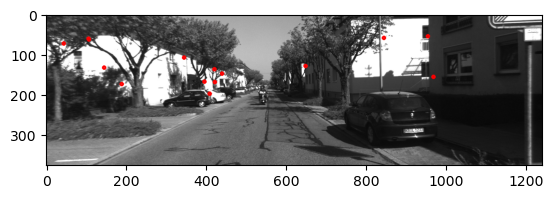

In [18]:
# feature matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des0, des1)
matches = sorted(matches, key=lambda x: x.distance)

# mark matches
for i in matches[:15]:
    idx = i.queryIdx
    x1, y1 = kp1[idx].pt
    cv2.circle(image0, (int(x1), int(y1)), 3, (255, 0, 0), 3)

plt.imshow(image0)
plt.show()